In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Use monthly data for policy-influenced or structural components (like taxes or refining), where changes are less frequent but more persistent.

### Data processing

In [12]:
makeup = pd.read_csv("datathon data/monthly_gasoline_makeup_percentages.csv")
gas_prices = pd.read_csv("datathon data/gas_prices/regular_formulated_gas_prices.csv")

In [13]:
makeup = makeup[makeup['Type'] == 'Regular'] # only regular gasoline prices
makeup['Month'] = pd.to_datetime(makeup['Date']).dt.to_period('M').dt.to_timestamp()

gas_prices['Date'] = pd.to_datetime(gas_prices['Date'])
gas_price_m_max =  gas_prices.resample('M', on='Date')['Price'].max().reset_index().rename({'Price':'Price_max'}, axis=1) #na for 0
gas_price_m_min =  gas_prices.resample('M', on='Date')['Price'].min().reset_index().rename({'Price':'Price_min'}, axis=1) #na for 0
gas_price_m_averaged =  gas_prices.resample('M', on='Date')['Price'].mean().reset_index().rename({'Price':'Price_average'}, axis=1) #na for 0
gas_price_m_averaged['Month'] = pd.to_datetime(gas_price_m_averaged['Date']).dt.to_period('M').dt.to_timestamp()

In [14]:
columns = ['Retail_Price', 'Refining', 'Distribution_and_Marketing', 'Taxes', 'Crude_Oil']
columns_pct = [c + '_pct' for c in columns]
columns_logreturn = [c + '_logreturn' for c in columns]
for col in columns:
    makeup[col + '_pct'] = makeup[col].pct_change()
    makeup[col + "_logreturn"] = np.log(makeup[col] / makeup[col].shift(1))
gas_price_m_averaged["Price_average_pct"] = gas_price_m_averaged["Price_average"].pct_change()

combined = pd.merge(makeup, gas_price_m_averaged, on='Month', how='inner')

/Users/yangzejia/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/yangzejia/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [15]:
combined

,Date_String,Date_x,Retail_Price,Refining,Distribution_and_Marketing,Taxes,Crude_Oil,Type,Year,Month,...,Refining_logreturn,Distribution_and_Marketing_pct,Distribution_and_Marketing_logreturn,Taxes_pct,Taxes_logreturn,Crude_Oil_pct,Crude_Oil_logreturn,Date_y,Price_average,Price_average_pct
0,Dec-23,12/1/2023,3.134,8.3,19.4,16.2,56.2,Regular,2023,2023-12-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-12-31,3.13400,-0.055455
1,Nov-23,11/1/2023,3.318,8.1,19.6,15.3,57.0,Regular,2023,2023-11-01,...,-0.024391,0.010309,0.010257,-0.055556,-0.057158,0.014235,0.014135,2023-11-30,3.31800,-0.081599
2,Oct-23,10/1/2023,3.613,7.3,21.5,14.0,57.2,Regular,2023,2023-10-01,...,-0.103990,0.096939,0.092523,-0.084967,-0.088795,0.003509,0.003503,2023-10-31,3.61280,-0.058186
3,Sep-23,9/1/2023,3.836,19.4,12.3,13.2,55.0,Regular,2023,2023-09-01,...,0.977399,-0.427907,-0.558454,-0.057143,-0.058841,-0.038462,-0.039221,2023-09-30,3.83600,-0.000977
4,Aug-23,8/1/2023,3.840,25.3,11.3,13.2,50.2,Regular,2023,2023-08-01,...,0.265531,-0.081301,-0.084797,0.000000,0.000000,-0.087273,-0.091318,2023-08-31,3.83975,0.067487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,May-00,05/01/2000,1.485,20.2,9.2,27.9,42.7,Regular,2000,2000-05-01,...,-0.094410,0.045455,0.044452,0.081395,0.078252,-0.009281,-0.009324,2000-05-31,1.48680,0.015054
284,Apr-00,04/01/2000,1.465,10.1,20.2,28.3,41.4,Regular,2000,2000-04-01,...,-0.693147,1.195652,0.786479,0.014337,0.014235,-0.030445,-0.030918,2000-04-30,1.46475,-0.033965
285,Mar-00,03/01/2000,1.517,15.4,12.8,27.3,44.6,Regular,2000,2000-03-01,...,0.421832,-0.366337,-0.456237,-0.035336,-0.035975,0.077295,0.074453,2000-03-31,1.51625,0.101126
286,Feb-00,02/01/2000,1.377,17.9,7.5,30.1,44.6,Regular,2000,2000-02-01,...,0.150433,-0.414062,-0.534542,0.102564,0.097638,0.000000,0.000000,2000-02-29,1.37700,0.068436


### Correlation Test

/var/folders/x0/l0tbxml95bn0hl8mg3ljsrr40000gn/T/ipykernel_18621/1540433227.py:23: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


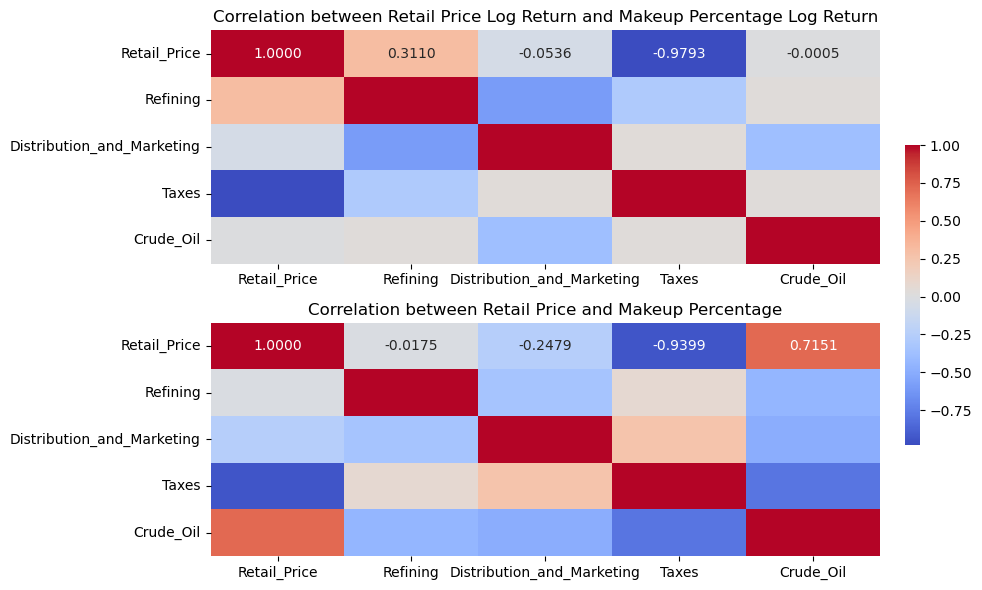

In [34]:
fig, axs = plt.subplots(2, 1, figsize=(10, 6))

# Compute correlation matrices
correlation_matrix_logreturn = combined[columns_logreturn].corr(method='pearson')
correlation_matrix = combined[columns].corr(method='pearson')

# Shared color scale
vmin = min(correlation_matrix.min().min(), correlation_matrix_logreturn.min().min())
vmax = max(correlation_matrix.max().max(), correlation_matrix_logreturn.max().max())

# Plot log return correlation heatmap
sns.heatmap(correlation_matrix_logreturn, annot=True, cmap='coolwarm', fmt=".4f", ax=axs[0],
            vmin=vmin, vmax=vmax, cbar=False)
axs[0].set_title("Correlation between Retail Price Log Return and Makeup Percentage Log Return")
axs[0].set_xticklabels(columns, rotation = 0)
axs[0].set_yticklabels(columns)

# Plot raw value correlation heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".4f", ax=axs[1],
            vmin=vmin, vmax=vmax, cbar=True, cbar_ax=fig.add_axes([0.91, 0.25, 0.015, 0.5]))
axs[1].set_title("Correlation between Retail Price and Makeup Percentage")

plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()


Text(0.5, 1.0, 'Correlation between Retail Price and Composition Percentage, pct')

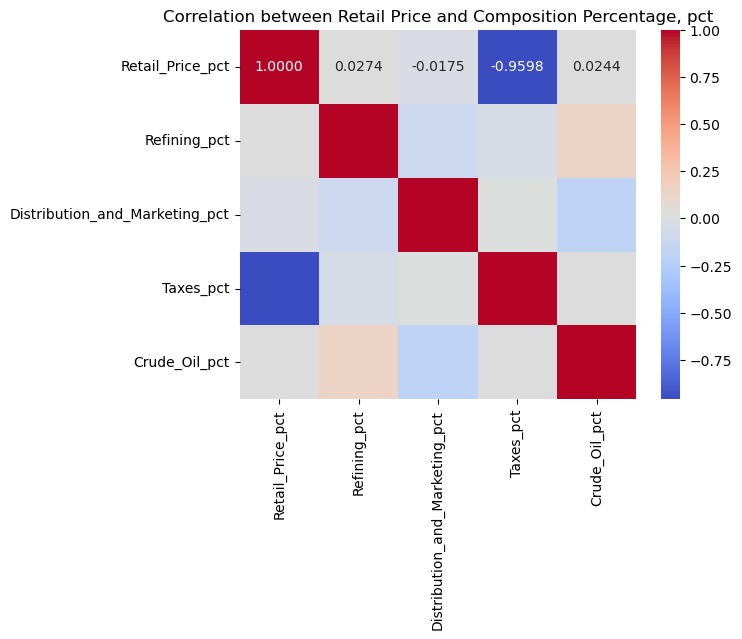

In [18]:
correlation_matrix_pct = combined[columns_pct].corr(method='pearson')
# Plot heatmaps without individual colorbars
sns.heatmap(correlation_matrix_pct, annot=True, cmap='coolwarm', fmt=".4f")
plt.title("Correlation between Retail Price and Composition Percentage, pct")

- crude oil prices are much more volatile weekly, and changes in crude oil are often reflected quickly in gasoline prices.
-  When you resample crude oil data monthly, you're smoothing out volatility, which makes it less informative in a monthly analysis.
- Thus, its correlation with monthly gasoline log returns appears weak, even though the weekly relationship is strong.

- The correlations between gasoline price log returns and its components (e.g. taxes, refining, distribution & marketing) are computed on a monthly frequency, meaning:
- They reflect slower, long-term relationships rather than immediate market reactions.
- This is why lag effects matter more — decisions and price adjustments take time to filter into retail prices.

Below studies the lagged impact
As we can see, Taxes 0 - 1 month, Refining 0 - 2 months, Distribution 1 months

In [20]:
cols = ['Taxes_logreturn', 'Crude_Oil_logreturn', 'Refining_logreturn', 'Distribution_and_Marketing_logreturn']

# Create lagged shifted) versions — shift by 4 if weekly data ≈ 1 month
for lag in range(5):
    for col in cols:
        combined[f'{col}_lag'] = combined[col].shift(lag)  # shift -4 to align "current" with "future"

    # Now calculate correlations between current and future values
    for col in cols:
        corr = combined[['Retail_Price_logreturn', f'{col}_lag']].corr().iloc[0, 1]
        print(f"Correlation between price logreturn and its previous {lag} month {col} : {corr:.4f}")


Correlation between price logreturn and its previous 0 month Taxes_logreturn : -0.9793
Correlation between price logreturn and its previous 0 month Crude_Oil_logreturn : -0.0005
Correlation between price logreturn and its previous 0 month Refining_logreturn : 0.3110
Correlation between price logreturn and its previous 0 month Distribution_and_Marketing_logreturn : -0.0536
Correlation between price logreturn and its previous 1 month Taxes_logreturn : -0.4139
Correlation between price logreturn and its previous 1 month Crude_Oil_logreturn : -0.0445
Correlation between price logreturn and its previous 1 month Refining_logreturn : -0.3679
Correlation between price logreturn and its previous 1 month Distribution_and_Marketing_logreturn : 0.4517
Correlation between price logreturn and its previous 2 month Taxes_logreturn : 0.0298
Correlation between price logreturn and its previous 2 month Crude_Oil_logreturn : 0.0942
Correlation between price logreturn and its previous 2 month Refining_logr

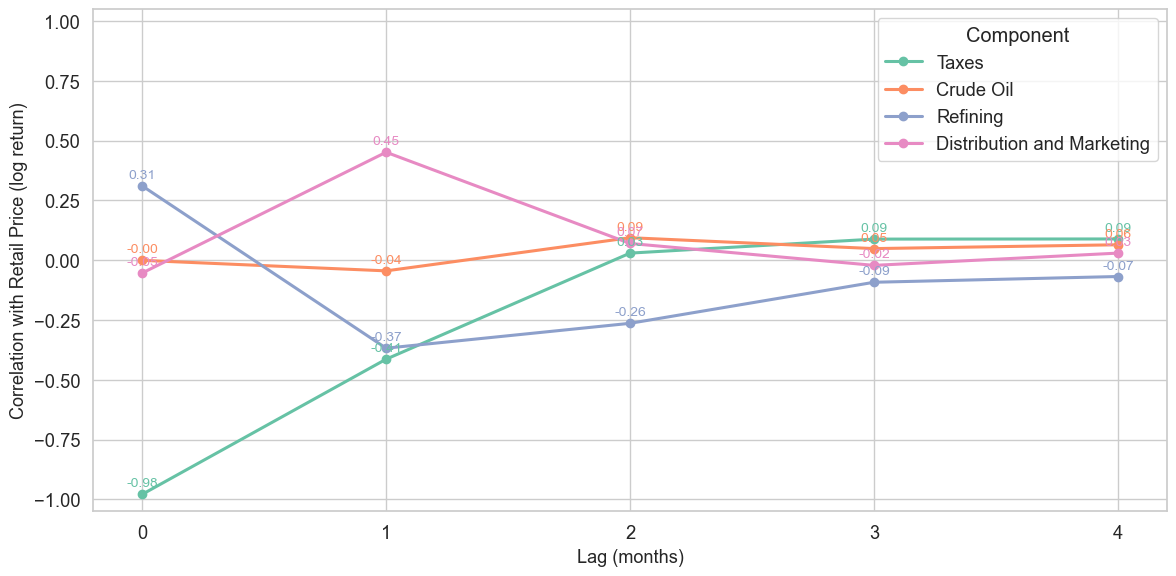

In [41]:
sns.set(style="whitegrid", context="notebook", font_scale=1.2)

cols = ['Taxes_logreturn', 'Crude_Oil_logreturn', 'Refining_logreturn', 'Distribution_and_Marketing_logreturn']
lag_range = range(5)
correlation_results = {col: [] for col in cols}

# Calculate correlations
for lag in lag_range:
    for col in cols:
        lagged_col = f'{col}_lag_{lag}'
        combined[lagged_col] = combined[col].shift(lag)
        corr = combined[['Retail_Price_logreturn', lagged_col]].corr().iloc[0, 1]
        correlation_results[col].append(corr)

# Define colors
palette = sns.color_palette("Set2", n_colors=len(cols))

# Plot
plt.figure(figsize=(12, 6))
for i, col in enumerate(cols):
    label = col.replace('_logreturn', '').replace('_', ' ')
    y_vals = correlation_results[col]
    plt.plot(lag_range, y_vals, marker='o', label=label, linewidth=2.2, color=palette[i])
    for x, y in zip(lag_range, y_vals):
        plt.text(x, y + 0.02, f"{y:.2f}", ha='center', va='bottom', fontsize=10, color=palette[i])

plt.xlabel('Lag (months)', fontsize=13)
plt.ylabel('Correlation with Retail Price (log return)', fontsize=13)
#plt.title('Lagged Correlation Between Retail Price and Gasoline Cost Components', fontsize=15, weight='bold')
plt.xticks(lag_range)
plt.ylim(-1.05, 1.05)
plt.legend(title="Component", loc='upper right')
plt.tight_layout()
plt.show()

